<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [37]:
!pip install pandas

In [38]:
!pip install matplotlib

In [39]:
!pip install seaborn

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [26]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-04-23 04:19:27--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  54.9MB/s    in 2.8s    

2025-04-23 04:19:30 (54.9 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



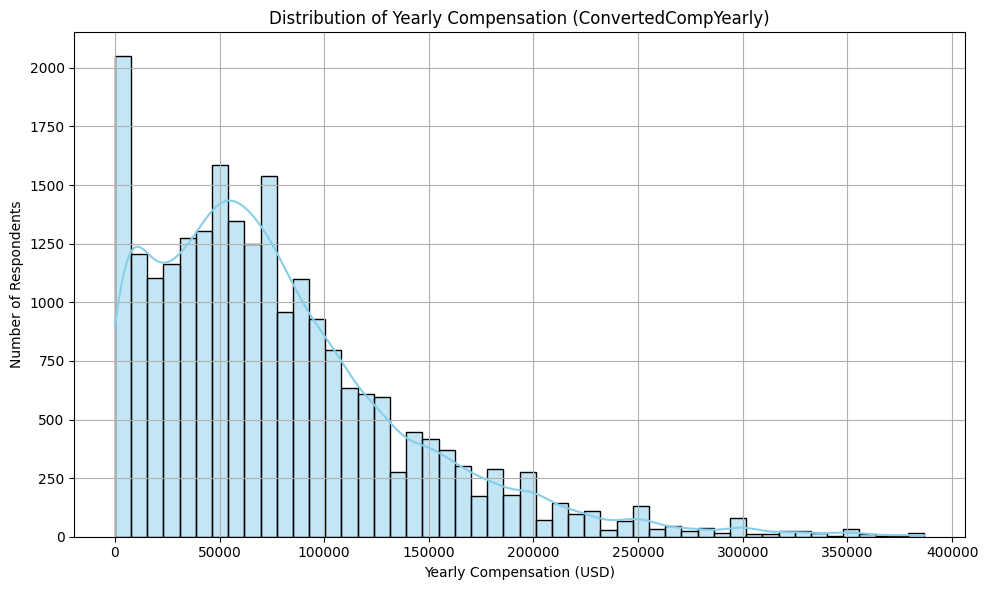

In [28]:
## Write your code here
df_clean = df[['ConvertedCompYearly']].copy()
df_clean['ConvertedCompYearly'] = pd.to_numeric(df_clean['ConvertedCompYearly'], errors='coerce')
df_clean = df_clean.dropna()

# Optional: Remove extreme outliers for better visualization
df_clean = df_clean[df_clean['ConvertedCompYearly'] < df_clean['ConvertedCompYearly'].quantile(0.99)]

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['ConvertedCompYearly'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Yearly Compensation (ConvertedCompYearly)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.tight_layout()
plt.grid(True)
plt.show()

##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



In [30]:
## Write your code here
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}

df['Age_numeric'] = df['Age'].map(age_map)
df = df.dropna(subset=['Age_numeric'])

### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



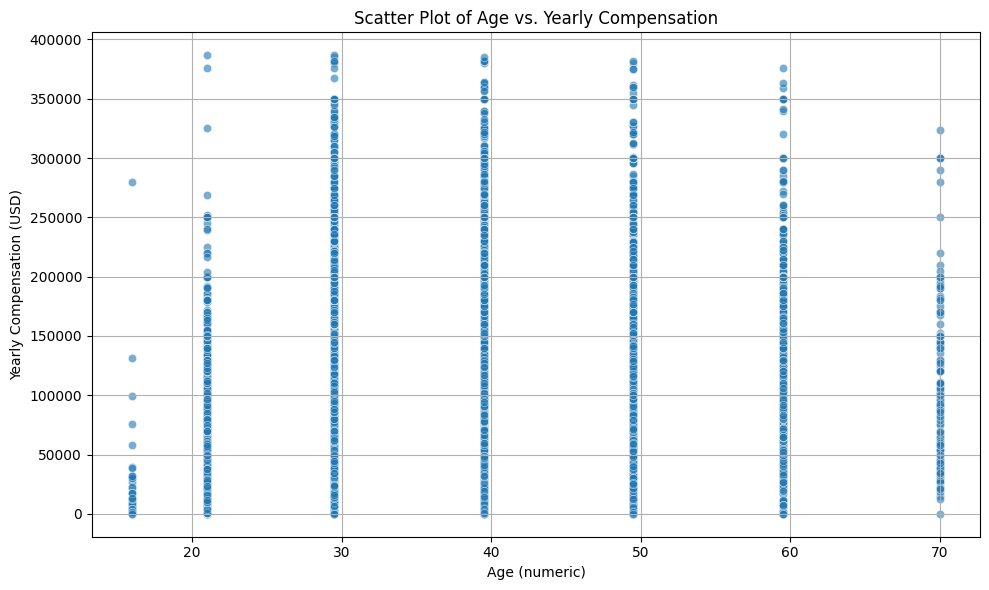

In [32]:
## Write your code here
df_clean = df[['Age_numeric', 'ConvertedCompYearly']].copy()
df_clean['ConvertedCompYearly'] = pd.to_numeric(df_clean['ConvertedCompYearly'], errors='coerce')
df_clean['Age_numeric'] = pd.to_numeric(df_clean['Age_numeric'], errors='coerce')
df_clean = df_clean.dropna()

# Optional: Filter out top 1% outliers for clearer visualization
df_clean = df_clean[df_clean['ConvertedCompYearly'] < df_clean['ConvertedCompYearly'].quantile(0.99)]

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age_numeric', y='ConvertedCompYearly', data=df_clean, alpha=0.6)
plt.title('Scatter Plot of Age vs. Yearly Compensation')
plt.xlabel('Age (numeric)')
plt.ylabel('Yearly Compensation (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


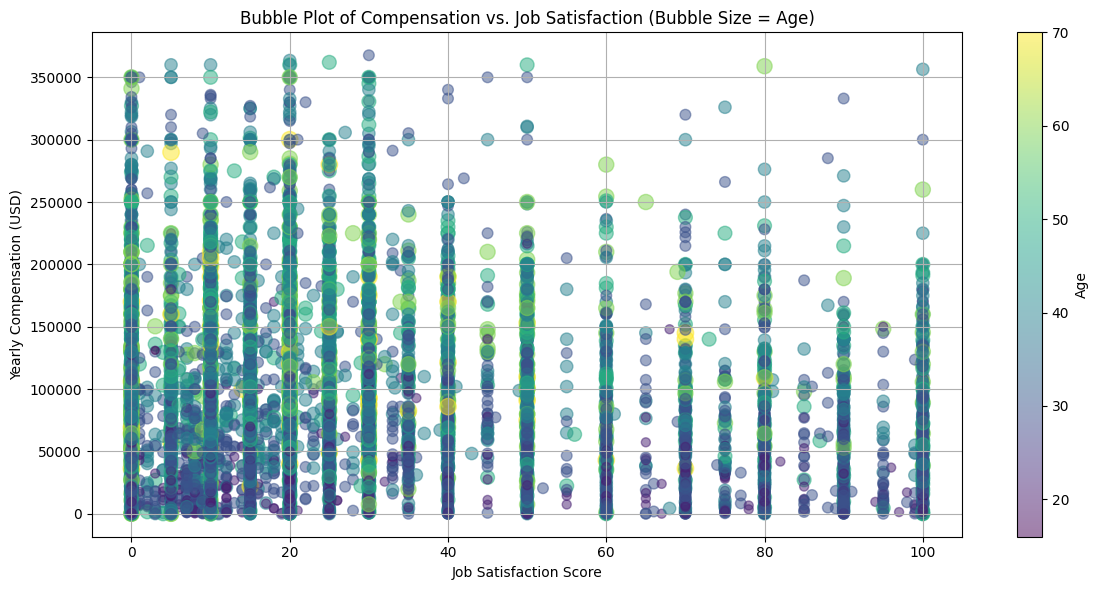

In [33]:
## Write your code here
df_bubble = df[['ConvertedCompYearly', 'JobSatPoints_6', 'Age_numeric']].copy()
df_bubble = df_bubble.dropna()
df_bubble['ConvertedCompYearly'] = pd.to_numeric(df_bubble['ConvertedCompYearly'], errors='coerce')
df_bubble['JobSatPoints_6'] = pd.to_numeric(df_bubble['JobSatPoints_6'], errors='coerce')
df_bubble['Age_numeric'] = pd.to_numeric(df_bubble['Age_numeric'], errors='coerce')

# Filter out extreme compensation values for readability (e.g., top 1%)
df_bubble = df_bubble[df_bubble['ConvertedCompYearly'] < df_bubble['ConvertedCompYearly'].quantile(0.99)]

# Create bubble plot
plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    x=df_bubble['JobSatPoints_6'],
    y=df_bubble['ConvertedCompYearly'],
    s=df_bubble['Age_numeric'] * 2,  # Adjust size scale
    alpha=0.5,
    c=df_bubble['Age_numeric'],
    cmap='viridis'
)

plt.colorbar(scatter, label='Age')
plt.title('Bubble Plot of Compensation vs. Job Satisfaction (Bubble Size = Age)')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Yearly Compensation (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



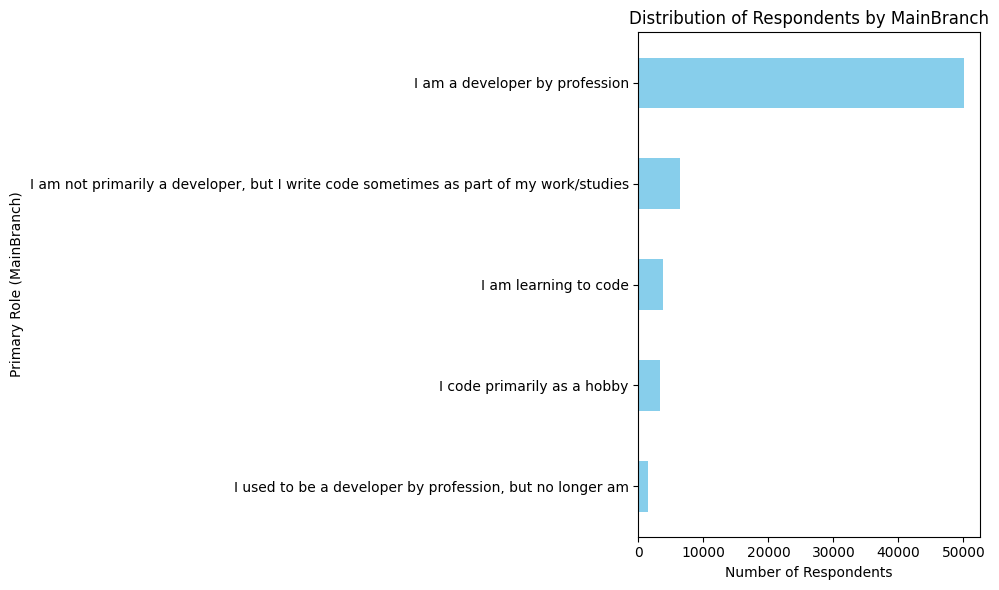

In [34]:
## Write your code here
main_branch_counts = df['MainBranch'].value_counts().sort_values()

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
main_branch_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Respondents')
plt.ylabel('Primary Role (MainBranch)')
plt.title('Distribution of Respondents by MainBranch')
plt.tight_layout()
plt.show()

##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



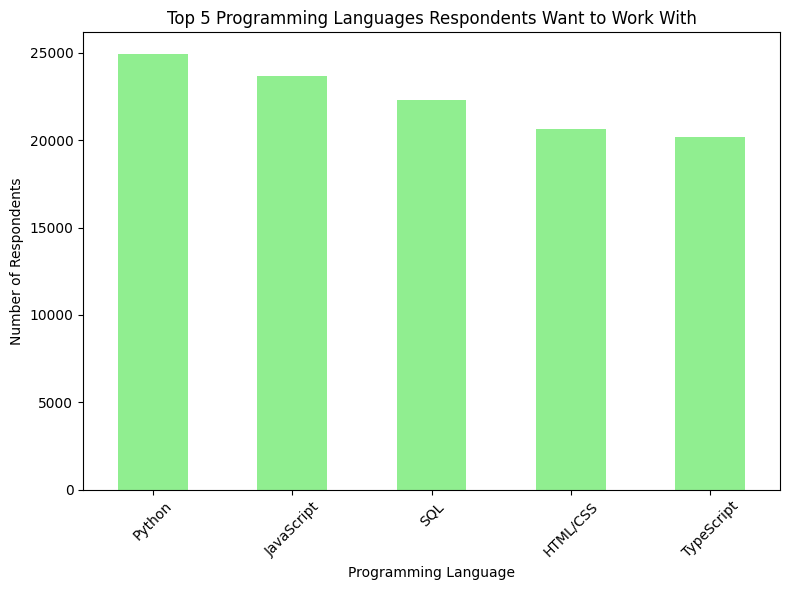

In [35]:
## Write your code here
language_series = df['LanguageWantToWorkWith'].dropna().str.split(';')
flat_languages = [lang.strip() for sublist in language_series for lang in sublist]

# Count occurrences and get top 5
lang_counts = pd.Series(flat_languages).value_counts().head(5)

# Plot vertical bar chart
plt.figure(figsize=(8, 6))
lang_counts.plot(kind='bar', color='lightgreen')
plt.title('Top 5 Programming Languages Respondents Want to Work With')
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


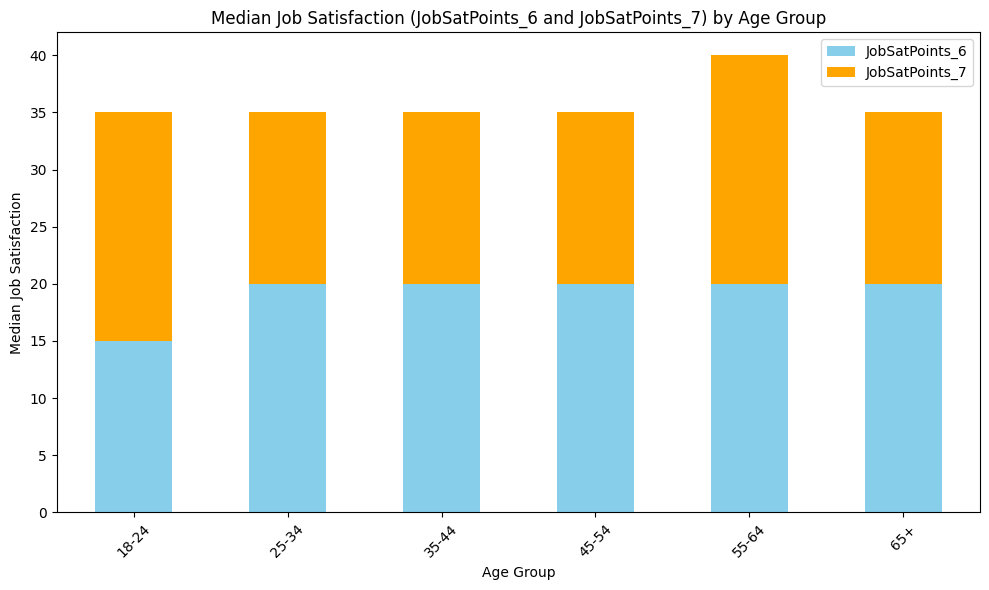

In [36]:
## Write your code here
# Create age bins for grouping
age_bins = [18, 24, 34, 44, 54, 64, 100]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['AgeGroup'] = pd.cut(df['Age_numeric'], bins=age_bins, labels=age_labels, right=False)

# Group by age and calculate the median JobSatPoints_6 and JobSatPoints_7
age_grouped = df.groupby('AgeGroup',observed=False)[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Plot stacked bar chart
age_grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'orange'])

plt.title('Median Job Satisfaction (JobSatPoints_6 and JobSatPoints_7) by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Job Satisfaction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



In [43]:
print(df['DatabaseHaveWorkedWith'].value_counts(dropna=False))
#database_counts = df['DatabaseHaveWorkedWith'].value_counts()
#print(database_counts)

DatabaseHaveWorkedWith
NaN                                                                                                                                                 15036
PostgreSQL                                                                                                                                           3210
Microsoft SQL Server                                                                                                                                 2234
MySQL                                                                                                                                                2088
SQLite                                                                                                                                               1751
                                                                                                                                                    ...  
Elasticsearch;Neo4J;PostgreSQL;Redis;SQLite          

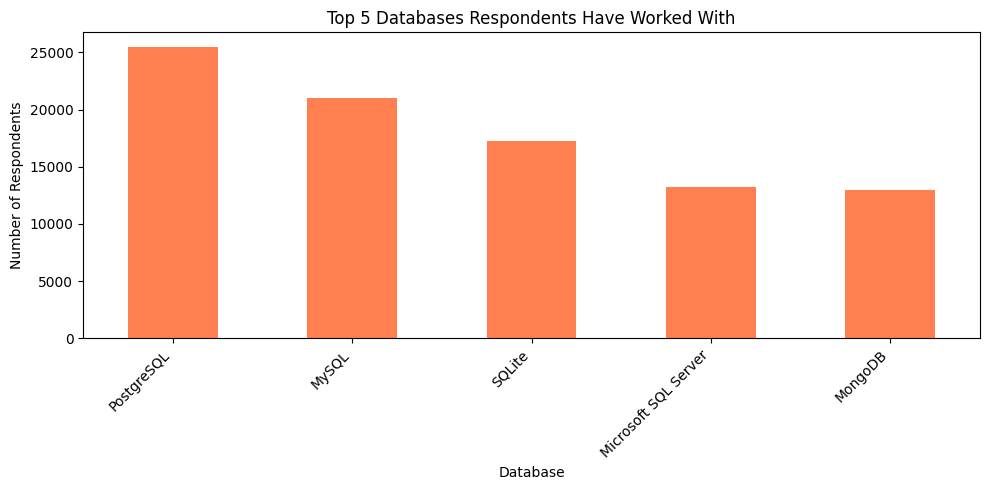

In [44]:
## Write your code here
df_filtered = df['DatabaseHaveWorkedWith'].dropna()

# Split comma-separated entries and explode the list into separate rows
all_databases = df_filtered.str.split(';|,').explode().str.strip()

# Count the frequency of each database
database_counts = all_databases.value_counts().head(5)

# Plot bar chart for the top 5 databases
plt.figure(figsize=(10, 5))
database_counts.plot(kind='bar', color='coral')
plt.title('Top 5 Databases Respondents Have Worked With')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



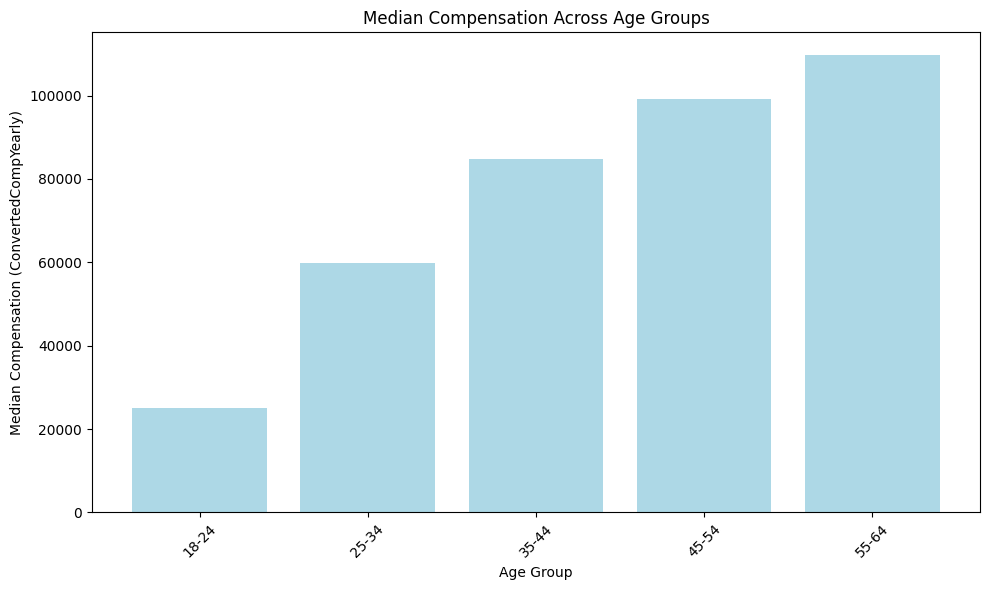

In [46]:
## Write your code here
age_bins = [18, 25, 35, 45, 55, 65]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64']
df['AgeGroup'] = pd.cut(df['Age_numeric'], bins=age_bins, labels=age_labels, right=False)

# Calculate median compensation (ConvertedCompYearly) for each age group
median_compensation = df.groupby('AgeGroup',observed=False)['ConvertedCompYearly'].median().reset_index()

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(median_compensation['AgeGroup'], median_compensation['ConvertedCompYearly'], color='lightblue')
plt.title('Median Compensation Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Median Compensation (ConvertedCompYearly)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



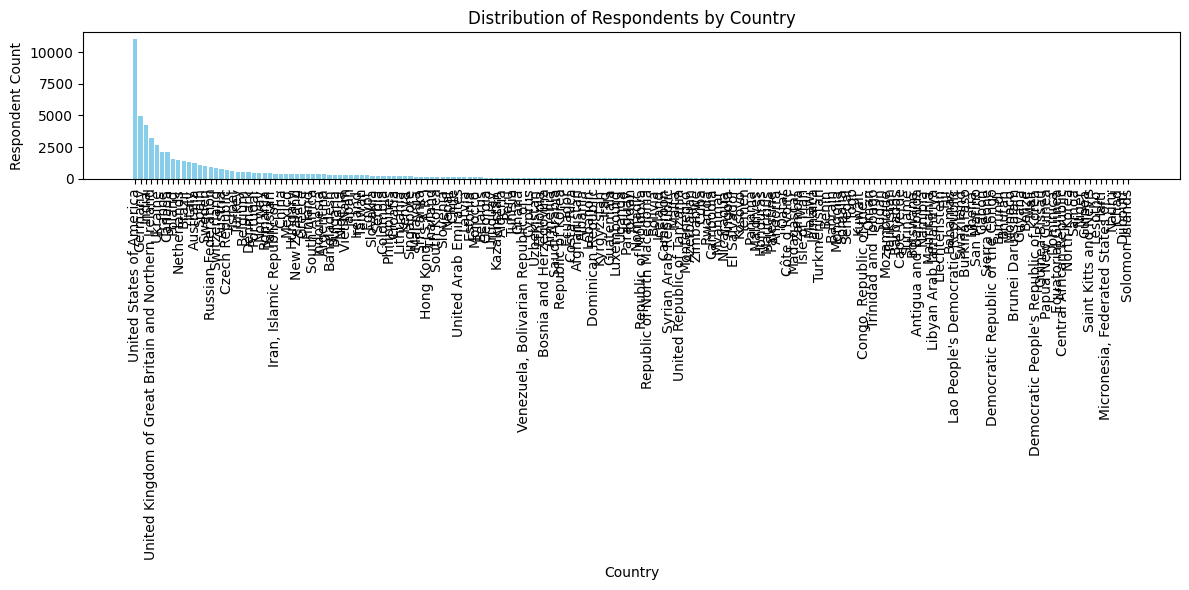

In [47]:
## Write your code here
# Group data by country and count respondents
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'RespondentCount']

# Plot bar chart of respondent count by country
plt.figure(figsize=(12, 6))
plt.bar(country_counts['Country'], country_counts['RespondentCount'], color='skyblue')
plt.title('Distribution of Respondents by Country')
plt.xlabel('Country')
plt.ylabel('Respondent Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

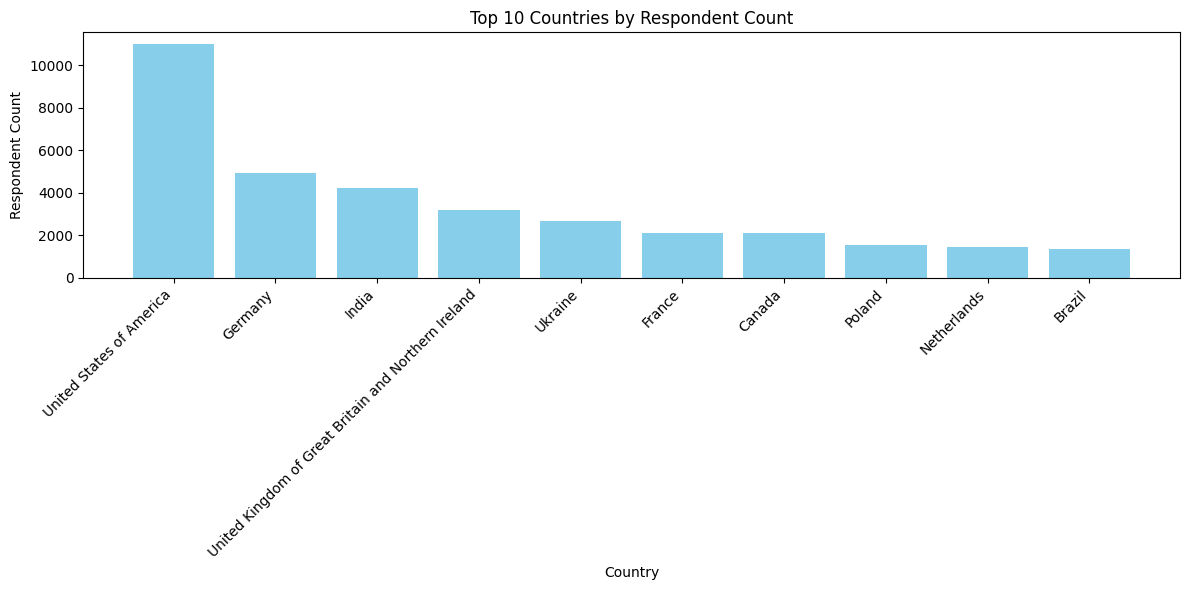

In [48]:
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'RespondentCount']

# Select only the top 10 countries
top_10_countries = country_counts.head(10)

# Plot bar chart of respondent count by country
plt.figure(figsize=(12, 6))
plt.bar(top_10_countries['Country'], top_10_countries['RespondentCount'], color='skyblue')
plt.title('Top 10 Countries by Respondent Count')
plt.xlabel('Country')
plt.ylabel('Respondent Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
